# ![](https://julyedu-img-public.oss-cn-beijing.aliyuncs.com/Public/img/index/logo.png)
# Python可视化教程 - - Seaborn

## 目录
- **探索变量关系**
- 分类数据的可视化分析
- 数据的分布的可视化**
- 线性模型可视化分析
- 绘制多张图

## 探索变量关系

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 散点图

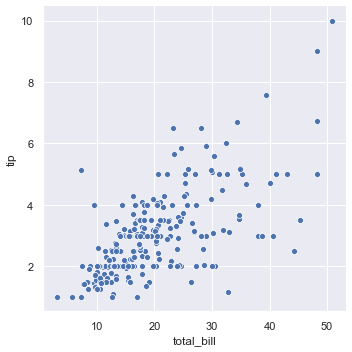

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips);

用hue可以根据某个column分成不同的颜色绘制

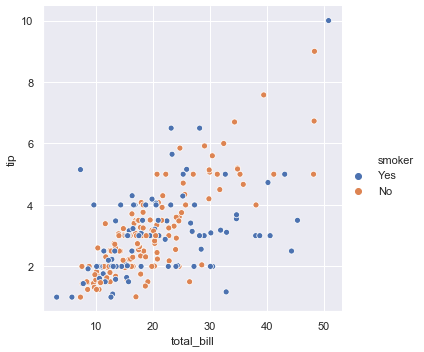

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

style还能根据一个column绘制不同的scatter点

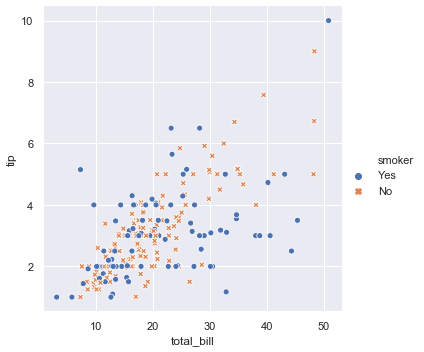

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

同时用颜色和marker类型来区分

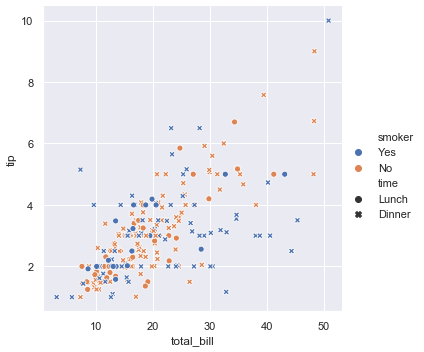

In [13]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

当hue的值是数值类型的时候，调色盘会自动利用颜色的深浅来渐变

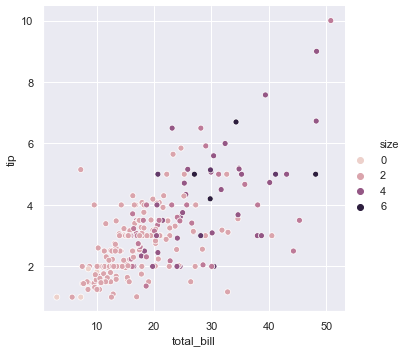

In [14]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

- ```sns.color_palette("hls", 8)```
- ```sns.hls_palette(8, l=.3, s=.8)```: lightness, saturation
- ```sns.color_palette("husl", 8)```
- ```sns.color_palette("Paired")```
- ```flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))```

更多关于调色板的内容参见 https://seaborn.pydata.org/tutorial/color_palettes.html

除了利用颜色的变化来区分类型之外，还可以利用绘图点的大小

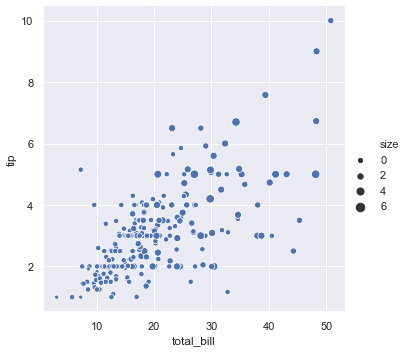

In [12]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

也可以指定一个大小的区间

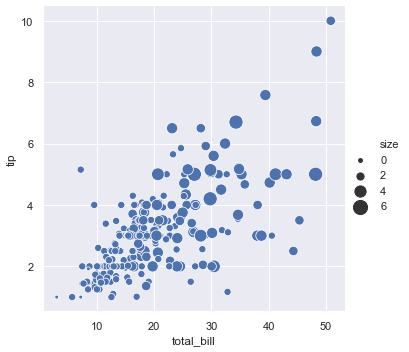

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

### 折线图
利用折线图，更容易看清数据变化的趋势

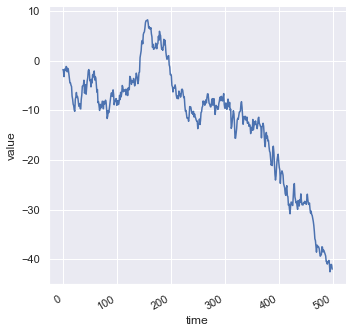

In [42]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

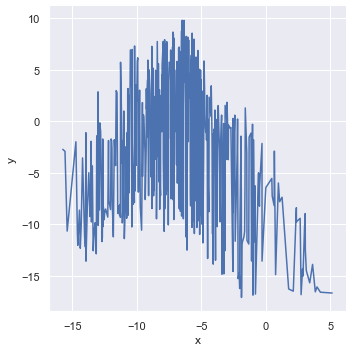

In [46]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", kind="line", data=df);

seaborn默认当存在x,y两个轴的时候，我们希望看y随着x变化的趋势，所以默认会按照x轴进行排序，但是我们也可以声明不排序

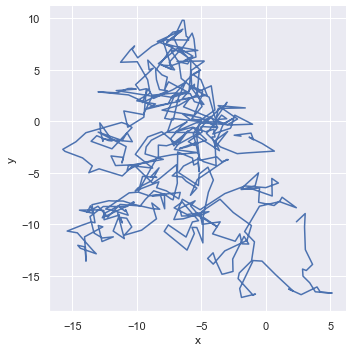

In [47]:
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

In [51]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


针对这种同一个x对应多个y的情况，line plot会根据mean和95%的置信区间(confidence interval)来作图

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


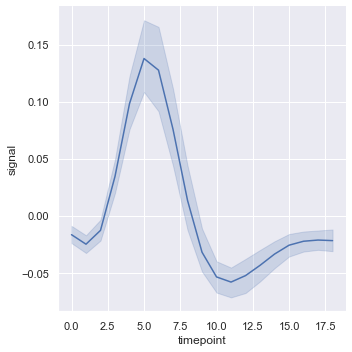

In [52]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

如果不需要置信区间

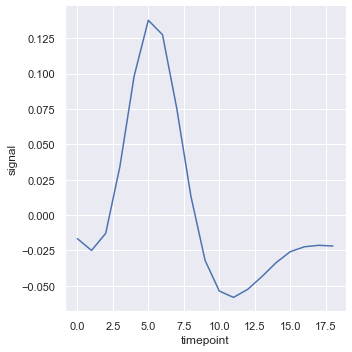

In [19]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

也可以改画标准差(standard deviation)而不是95%置信区间

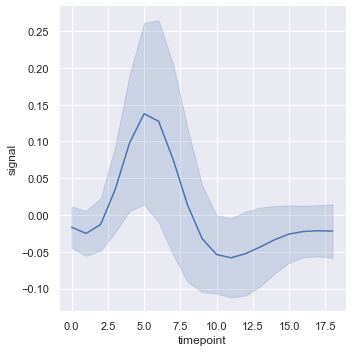

In [21]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

如果把estimator设置成None，我们会得到下面这样的图

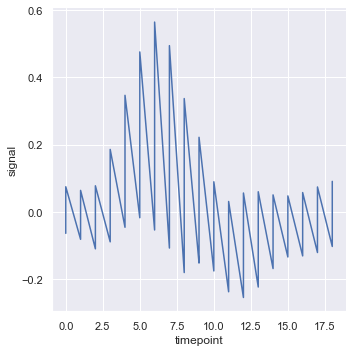

In [54]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

与scatterplot一样，lineplot也可以用hue分类

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


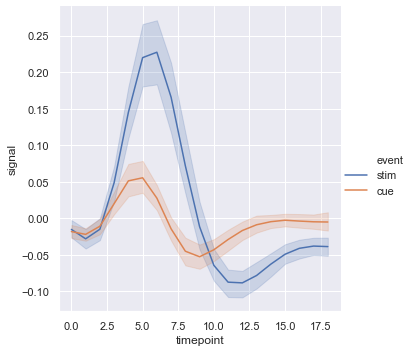

In [55]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

同样地，我们可以针对某个column替换style

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


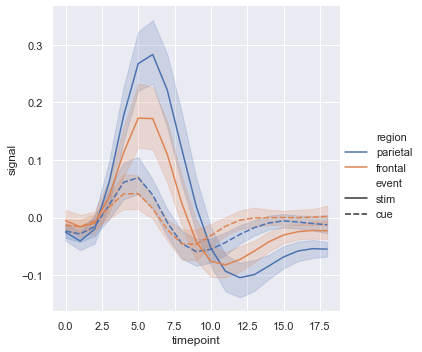

In [57]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

还有更多可以调的参数，更多详情参见 https://seaborn.pydata.org/generated/seaborn.relplot.html

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


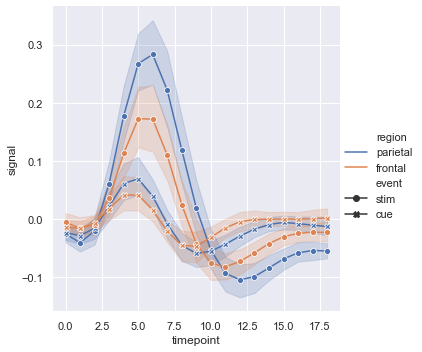

In [59]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

同时改变hue颜色和style

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


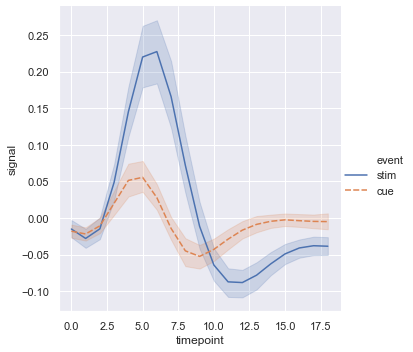

In [60]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

In [61]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
